In [1]:
import pathlib
import json
import copy

import pandas as pd
import geopandas as gpd
import numpy as np

import dtv_backend.chart_templates
import dtv_backend.charts

In [2]:
path = pathlib.Path('../../dtv_backend/tests/user/2022-11-04-result.json')

In [3]:
with open(path) as f:
    results = json.load(f)

#### KPI trip duration

In [4]:
echart = dtv_backend.charts.trip_duration(results)
print(json.dumps(echart))

{"title": {"text": "Trip duration", "subtext": "Duration per trip"}, "tooltip": {"trigger": "axis", "axisPointer": {"type": "cross"}}, "toolbox": {"show": true, "feature": {"saveAsImage": {}}}, "xAxis": {"type": "category", "boundaryGap": true, "data": [0, 1, 2, 3, 4]}, "yAxis": {"type": "value", "axisLabel": {"formatter": "{value}"}, "axisPointer": {"snap": true}}, "visualMap": {"show": true, "dimension": 1, "pieces": [{"lte": 32.98, "color": "green"}, {"gt": 32.98, "color": "red"}]}, "series": [{"name": "Trip duration", "type": "scatter", "data": [30.731666666666666, 37.88027777777778, 37.88055555555555, 37.88055555555555, 22.72888888888889]}]}


#### KPI duration breakdown

In [5]:
echart = dtv_backend.charts.duration_breakdown(results)
print(json.dumps(echart))

{"tooltip": {"trigger": "item", "formatter": "{b} : {c}h ({d}%)"}, "legend": {"orient": "vertical", "left": "left", "data": ["Sailing", "Load"]}, "series": [{"name": "Duration breakdown", "type": "pie", "radius": "80%", "center": ["50%", "50%"], "data": [{"value": 101.01, "name": "Load"}, {"value": 66.09194444444445, "name": "Sailing"}], "emphasis": {"itemStyle": {"shadowBlur": 10, "shadowOffsetX": 0, "shadowColor": "rgba(0, 0, 0, 0.5)"}}}]}


#### KPI trips

What is intended to be shown here?

In [6]:
gdf = gpd.GeoDataFrame.from_features(results["log"]["features"])

cycle_idx = np.logical_and(
    gdf["Actor type"] == "Ship", gdf["Name"] == "Cycle")
selected = gdf[cycle_idx].reset_index(drop=True)
echart = copy.deepcopy(dtv_backend.chart_templates.trip_duration_template)
echart["xAxis"]["data"] = selected.index.tolist()
durations = pd.to_datetime(
    selected["Stop"]) - pd.to_datetime(selected["Start"])
hours = durations.dt.total_seconds() / 3600

bins = np.histogram_bin_edges(hours, bins='sturges' )
bins = np.ceil(bins)

# make numbers prettier
bins = np.unique(np.ceil(bins)).astype('int')
min_hours = np.floor(hours.min()).astype('int')
print(min_hours)
counts, bins = np.histogram(hours.tolist(), [min_hours] +  bins.tolist())

counts, bins


22


(array([1, 0, 1, 0, 3]), array([22, 23, 27, 31, 35, 38]))

<AxesSubplot:>

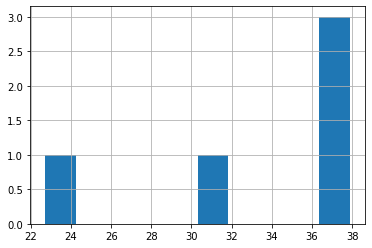

In [7]:
hours.hist()

In [8]:
echart = dtv_backend.charts.trip_histogram(results)
echart['xAxis']['data'] = bins.tolist()
echart['series'][0]['data'] = counts.tolist()
json.dumps(echart)

'{"xAxis": {"name": "Duration", "type": "category", "data": [22, 23, 27, 31, 35, 38]}, "yAxis": {"type": "value", "name": "Count"}, "legend": {"data": ["Duration [h]"]}, "series": [{"name": "Duration [h]", "data": [1, 0, 1, 0, 3], "type": "bar", "barWidth": "99.3%"}]}'

#### KPI TON km

WIP

In [24]:
echart = dtv_backend.charts.energy_per_distance(results)
print(json.dumps(echart))

{"toolbox": {"feature": {"dataZoom": {}, "restore": {}}}, "legend": {"data": ["Energy [kWh / km]"], "left": 10}, "tooltip": {"trigger": "axis"}, "dataZoom": [{"show": true, "realtime": true}], "title": {"left": "center", "text": "Energy by distance"}, "xAxis": {"type": "value"}, "yAxis": {"type": "value"}, "series": [{"name": "Energy [kWh / km]", "type": "line", "data": [[3487.7494918607426, 0.044219728690930334], [6975.498983721485, 0.044219728690930334], [8617.60747458461, 0.044219728690930334], [9203.70344885305, 0.044219728690930334], [9694.448685534771, 0.044219728690930334], [10500.883939730613, 0.044219728690930334], [10859.939197416097, 0.044219728690930334], [14123.866692065838, 0.04421972869093033], [15055.686068069917, 0.04421972869093033], [20106.180533888124, 0.04421972869093034], [20117.248929260204, 0.04421972869093034], [20155.922845446912, 0.04421972869093034], [30049.299161408017, 0.04421972869093034], [37564.49591926523, 0.044219728690930334], [38685.77340030621, 0.0

In [23]:
echart = dtv_backend.charts.energy_per_time(results)
json.dumps(echart);